In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


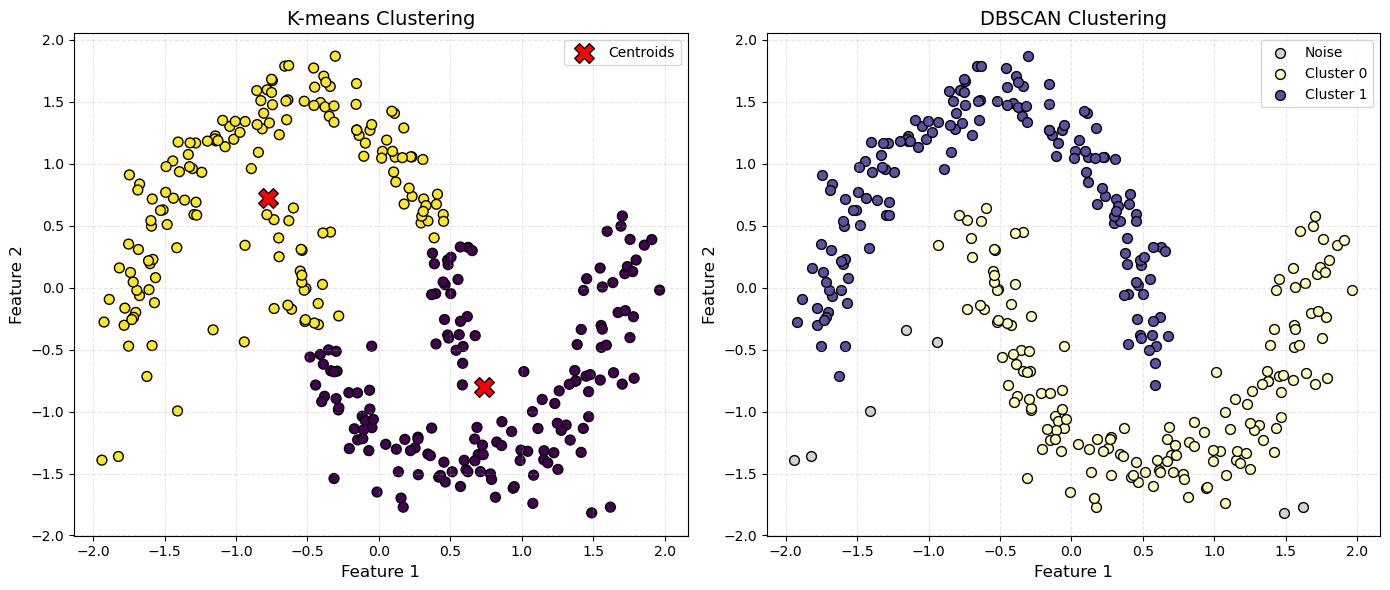

In [5]:
# Create a sample dataset with two moon shapes and some noise
X, _ = make_moons(n_samples=300, noise=0.08, random_state=42)
X = StandardScaler().fit_transform(X)  # Standardize features

# Add some random noise
noise = np.random.uniform(low=-2, high=2, size=(20, 2))
X = np.vstack([X, noise])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Create the figure with two subplots
plt.figure(figsize=(14, 6))

# K-means plot (left panel)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='k', label='Centroids')
plt.title('K-means Clustering', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# DBSCAN plot (right panel)
plt.subplot(1, 2, 2)
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise
        color = 'lightgrey'
        label_text = 'Noise'
    else:
        label_text = f'Cluster {label}'

    class_member_mask = (dbscan_labels == label)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], s=50, edgecolors='k', label=label_text)

plt.title('DBSCAN Clustering', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig("clusters_comparison.png", dpi=300, bbox_inches="tight")
plt.show()